# Lab 2: Thermistor

The purpose of this lab is to measure the temperature of two "coffee" (boiling water) cups over time as "milk" (ice water) is added to it. 

In [43]:
import pandas as pd
import numpy as np
%matplotlib inline

### Raw Data

The data was collected by putting a thermistor in a voltage divider circuit. The output voltage was collected and read by using the oscilloscope function of the Analog Discovery.

`(insert circuit diagram)`

After the lab was completed, the total volume of water in each cup was measured. This includes the 40 mL of water that was added during the lab.

In [36]:
# Read Raw Data

raw_data_filename = 'thermistor_data.csv'
data = pd.read_csv(raw_data_filename)

# Configuration Data
v_in = 5  # V
r_1 = 1000  # Ohms

# Volume data
# Total volume was measured at the end of the lab, after one
# "unit" of ice water was added to each cup.
c1_total_volume = 188  # mL
c2_total_volume = 191  # mL
ice_volume = 40  # mL

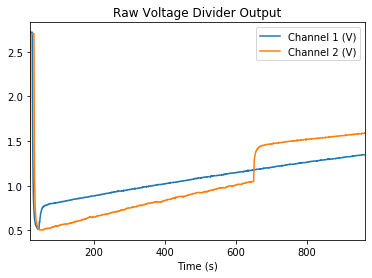

In [42]:
# Plot voltage vs time
data.plot(x='Time (s)', y=['Channel 1 (V)', 'Channel 2 (V)'], title='Raw Voltage Divider Output')

### Calculate thermistor resistance

The thermistor resistance can be defined as a function of $R_1$ and $V_{out}$ by using the voltage divider equation.

$$ V_{out} = V_{in} \times {R_{therm} \over {R_1 + R_{therm}}} \\
R_{therm} = {V_{out} \times R_1 \over {V_{in} - V_{out}}} $$

In [38]:
r_therm_1 = data['Channel 1 (V)'] * r_1 / (v_in - raw_data['Channel 1 (V)'])
r_therm_2 = data['Channel 2 (V)'] * r_1 / (v_in - raw_data['Channel 2 (V)'])

data.insert(3, 'Therm Res 1 (Ohms)', r_therm_1, True)
data.insert(4, 'Therm Res 2 (Ohms)', r_therm_2, True)

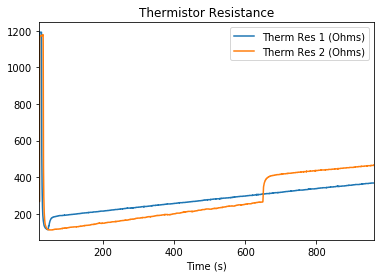

In [40]:
# Plot resistance vs time
data.plot(x='Time (s)', y=['Therm Res 1 (Ohms)', 'Therm Res 2 (Ohms)'], title='Thermistor Resistance')


### Calculate temperature

The thermistor has a defined resistance as:

$$ R = 1000 \Omega \times e ^ {-3528 {({1 \over 298} - {1 \over T})}} \\
T = {1 \over {{1 \over 298} + {3528 \over {ln({R \over 1000})}}}} $$

In [47]:
temp_therm_1 = 1/(1/298 + 3528 / (np.log(data['Therm Res 1 (Ohms)'] / 1000)))
temp_therm_2 = 1/(1/298 + 3528 / (np.log(data['Therm Res 2 (Ohms)'] / 1000)))

data.insert(5, 'Therm Temp 1 (K)', temp_therm_1, True)
data.insert(6, 'Therm Temp 2 (K)', temp_therm_2, True)

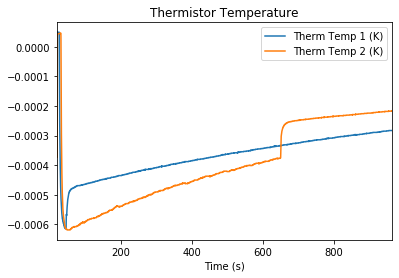

In [48]:
# Plot temperature vs time
data.plot(x='Time (s)', y=['Therm Temp 1 (K)', 'Therm Temp 2 (K)'], title='Thermistor Temperature')